In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
os.chdir('/Users/be2297/Documents/Columbia/Research/Fulfillment/FulfillmentOptimization')
print(os.getcwd())

/Users/be2297/Documents/Columbia/Research/Fulfillment/FulfillmentOptimization


In [7]:
demand_model,low_reward, T = 'markov', '05', '15'
data = pd.read_csv(f'three_node_{demand_model}_T{T}_filter.csv')
data

,policy_name,number_samples,average,standard_deviation
0,myopic,10,8.384328,0.000000
1,myopic,50,8.384328,0.000000
2,myopic,100,8.384328,0.000000
3,myopic,500,8.384328,0.000000
4,myopic,1000,8.384328,0.000000
5,myopic,5000,8.384328,0.000000
6,balance,10,8.358209,0.000000
7,balance,50,8.358209,0.000000
8,balance,100,8.358209,0.000000
9,balance,500,8.358209,0.000000


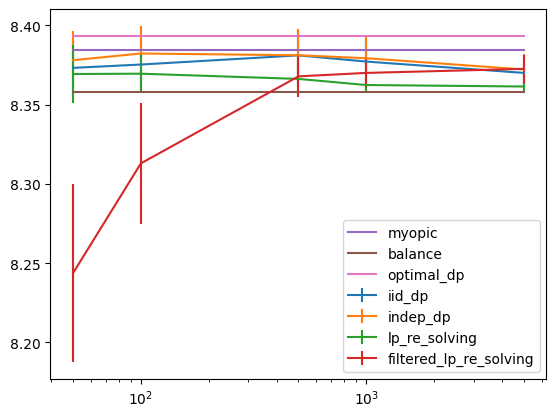

In [8]:


data_driven_policies = ['iid_dp', 'indep_dp', 'lp_re_solving', 'filtered_lp_re_solving']
if demand_model == 'rw':
    data_agnostic_policies = [ 'myopic', 'balance']
else:
    
    data_agnostic_policies = [ 'myopic', 'balance','optimal_dp']
    
    
for policy_name in data_driven_policies:
    subdf = data[(data['policy_name'] == policy_name) & (data['number_samples']>10)]
    plt.errorbar(subdf['number_samples'], subdf['average'], yerr=subdf['standard_deviation'], label = policy_name)                    
for policy_name in data_agnostic_policies:
    subdf = data[(data['policy_name'] == policy_name) & (data['number_samples']>10)]
    plt.plot(subdf['number_samples'], subdf['average'], label = policy_name)



plt.legend()
plt.xscale('log')
plt.show()